In [70]:
import keras
from keras.datasets import cifar10

# load the pre-shuffled train and test data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

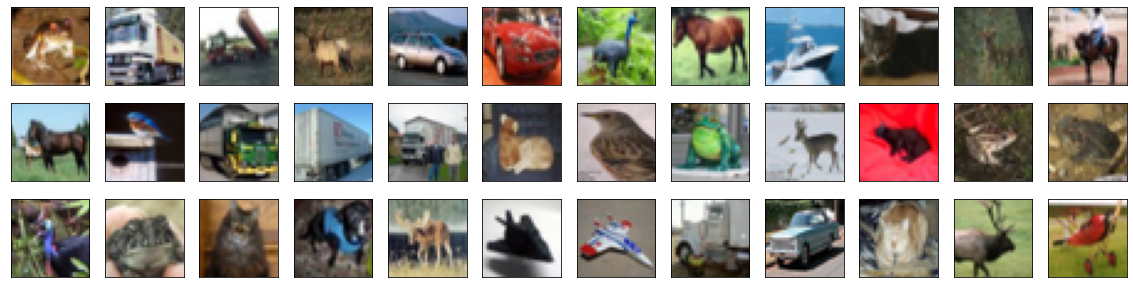

In [71]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

In [72]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [76]:

from tensorflow.keras.utils import to_categorical

# one-hot encode the labels
num_classes = len(np.unique(y_train))                      # Checking how many unique values are there in the ouput test data.
y_train = keras.utils.to_categorical(y_train, num_classes)  # converting to the one hot encoding.
                                                             # looks like this 1 - [0,1,0,0,0,0,0,0,0,0]
                                                                               2 - [0,0,1,0,0,0,0,0,0,0] etc.     
y_test = keras.utils.to_categorical(y_test, num_classes)

# break training set into training and validation sets
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]      # splitting the data into x_train, x_valid, y_train, y_valid.

# print shape of training set
print('x_train shape:', x_train.shape)
 
# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

x_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


- Sequential is a model which is imported from the keras framework.
- Conv2D which is used fro the convoultion process only the 2d  dimension data should be sent to the next domain.
- MaxPooling is to reduce the size of the convolution matrix data to the lesser matrix.
- Flatten - We need to send the data to the classification in the formof the 1-D for that we use flatten.
- ANN Network wont accept if the data is in the form of the 2-D.
- Dense it is neural network.
- Dropout - is used for firing some neurons so that the others neurons will learn non-linearity.

In [77]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=3, padding='same', activation='relu', 
                        input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500, activation='relu'))   
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)                   │ (None, 32, 32, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 16, 16, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 16, 16, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 8, 8, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 500)                 │         512,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           5,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 541,094 (2.06 MB)

 Trainable params: 541,094 (2.06 MB)

 Non-trainable params: 0 (0.00 B)

In [78]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [82]:


from keras.callbacks import ModelCheckpoint

# Train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.keras', verbose=1, save_best_only=True)

hist = model.fit(
    x_train, y_train,
    batch_size=32, 
    epochs=10,
    validation_data=(x_valid, y_valid), 
    callbacks=[checkpointer], 
    verbose=2, 
    shuffle=True
)


Epoch 1/10

Epoch 1: val_loss improved from inf to 0.97245, saving model to model.weights.best.keras
1407/1407 - 24s - 17ms/step - accuracy: 0.6818 - loss: 0.9218 - val_accuracy: 0.6722 - val_loss: 0.9724
Epoch 2/10

Epoch 2: val_loss did not improve from 0.97245
1407/1407 - 23s - 17ms/step - accuracy: 0.6895 - loss: 0.9164 - val_accuracy: 0.6476 - val_loss: 1.0579
Epoch 3/10

Epoch 3: val_loss improved from 0.97245 to 0.93002, saving model to model.weights.best.keras
1407/1407 - 24s - 17ms/step - accuracy: 0.6894 - loss: 0.9085 - val_accuracy: 0.6904 - val_loss: 0.9300
Epoch 4/10

Epoch 4: val_loss did not improve from 0.93002
1407/1407 - 23s - 17ms/step - accuracy: 0.6940 - loss: 0.9085 - val_accuracy: 0.6638 - val_loss: 1.0518
Epoch 5/10

Epoch 5: val_loss did not improve from 0.93002
1407/1407 - 24s - 17ms/step - accuracy: 0.6963 - loss: 0.9071 - val_accuracy: 0.6700 - val_loss: 1.1514
Epoch 6/10

Epoch 6: val_loss did not improve from 0.93002
1407/1407 - 24s - 17ms/step - accuracy

- From the above results model is not performing  well on your train data if its not performing good on the train data
- it will not perform on the test data.

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step


<Figure size 1800x1800 with 0 Axes>

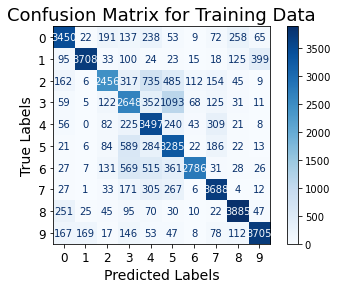

In [88]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Make predictions on the training set
y_train_pred = model.predict(x_train)

# Convert predictions and true labels from one-hot encoding to class labels
y_train_pred_classes = np.argmax(y_train_pred, axis=1)  # Predicted classes
y_train_true_classes = np.argmax(y_train, axis=1)  # True classes

# Compute the confusion matrix
cm_train = confusion_matrix(y_train_true_classes, y_train_pred_classes)

# Set the figure size explicitly and increase the font size of labels/ticks
plt.figure(figsize=(25, 25))  # Increase figure size
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=np.arange(num_classes))

# Adjust font sizes for labels and ticks
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Training Data", fontsize=18)
plt.xlabel("Predicted Labels", fontsize=14)
plt.ylabel("True Labels", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()


- From the above confusion the wrong outputs are ver large.
- True values are for the 1 figure we have predicted as 9 mistakenly for 399 times.
- if its 2 we have predcited 5 for 485 times.
- if its 5 we have predicted 3.

In [90]:
model.load_weights('model.weights.best.keras')

In [91]:
# get predictions on the test set
y_hat = model.predict(x_test)

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


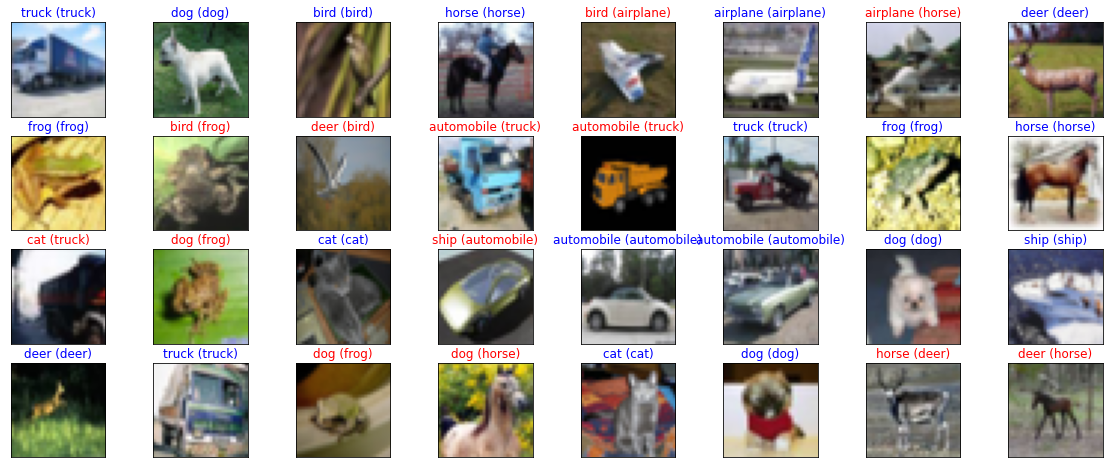

In [92]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("blue" if pred_idx == true_idx else "red"))

- From above we have made many wrong predictions our model is not performing good on both the train data and test data.